In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns

#1. Read in the file. This is a synchronized file with my OneDrive from a folder Fernanda shared with me.
<br> I start working with the form that was generated in the field; this is, the cow ids, sample and stall ids, and hygiene scores

In [46]:
# Farm Visit 02-June-2020

#file_path = "/Users/gemavidal/Vet/University of California, Davis/Fernanda Carolina Ferreira - Cowmanager/06022020/06022020_FarmVisit.csv"
#df = pd.read_csv(file_path, index_col = False)

In [2]:
# Farm Visit 30-June-2020

#file_path = "/Users/gemavidal/Vet/University of California, Davis/Fernanda Carolina Ferreira - Cowmanager/06302020/06302020_FarmVisit.csv"
#df = pd.read_csv(file_path, index_col = False)

In [2]:
# Farm Visit 04-August-2020

file_path = "/Users/gemavidal/Vet/University of California, Davis/Fernanda Carolina Ferreira - Cowmanager/08042020/08042020_FarmVisit.csv"
df = pd.read_csv(file_path, index_col = False)

Take a look at the first rows. The columns should be:<br>
date (2-Jun-20; object), <br>
scc_sample_id (object), <br>
stall_number (int64), <br>
cow_id (int64), <br>
hygiene_score (object), <br>
hygiene_score_notes (object), <br>
recorder (object), <br>
notes (object)<br>

In [4]:
df.head(5)

,date,scc_sample_id,stall_number,cow_id,hygiene_score,hygiene_score_notes,recorder,notes
0,4-Aug-20,1,53,7546,1,NaN,daniela,NaN
1,4-Aug-20,2,54,3562,2,NaN,daniela,NaN
2,4-Aug-20,3,55,2478,1,NaN,daniela,NaN
3,4-Aug-20,4,56,5781,2,NaN,daniela,NaN
4,4-Aug-20,5,57,2344,3,NaN,daniela,NaN


In [5]:
# Take a look at the dimensions of the dataframe
df.shape

(43, 8)

In [6]:
# Take a look at the structure/format of each column
df.dtypes

date                    object
scc_sample_id            int64
stall_number             int64
cow_id                   int64
hygiene_score            int64
hygiene_score_notes    float64
recorder                object
notes                  float64
dtype: object

<br>
Try to find duplicates of funny notations

In [7]:
# Take a look at the different levels (focus on categorical variables)

for i in df:
    print (df[i].value_counts())

4-Aug-20    43
Name: date, dtype: int64
43    1
11    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
10    1
21    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
20    1
22    1
42    1
33    1
41    1
40    1
39    1
38    1
37    1
36    1
35    1
34    1
32    1
23    1
31    1
30    1
29    1
28    1
27    1
26    1
25    1
24    1
1     1
Name: scc_sample_id, dtype: int64
63    1
1     1
9     1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
8     1
20    1
72    1
7     1
70    1
69    1
68    1
67    1
66    1
65    1
2     1
21    1
62    1
53    1
61    1
60    1
59    1
58    1
57    1
56    1
55    1
54    1
5     1
22    1
6     1
4     1
19    1
18    1
3     1
10    1
24    1
23    1
64    1
Name: stall_number, dtype: int64
7678    1
3855    1
4059    1
7439    1
5785    1
5894    1
5781    1
7477    1
4690    1
400     1
5453    1
2013    1
2856    1
7563    1
1738    1
2696    1
5831    1
7494    1
5124    1
1896    1
7114 

There is one row that is for a cow that didn't come to the parlor to be dried. Remove that row using 'hygiene_score'

In [51]:
df = df.loc[(df['hygiene_score'] != 'not dry')]

# Double-check there is one row less in the dataframe
df.shape

(36, 8)

<br> Lets work on the dates. Create a time stamp (this data doesn't have the hour of the day but later it should be assigned a time for the hygiene score and DHI lab results, so sensor data are only used up to the time of dry-off).

In [8]:
df['date'].head(3)

0    4-Aug-20
1    4-Aug-20
2    4-Aug-20
Name: date, dtype: object

In [9]:
df['date_stamp'] = pd.to_datetime(df["date"], format = '%d-%b-%y')
df['month'] = df['date_stamp'].dt.month
df['year'] = df['date_stamp'].dt.year

In [10]:
df.dtypes

date                           object
scc_sample_id                   int64
stall_number                    int64
cow_id                          int64
hygiene_score                   int64
hygiene_score_notes           float64
recorder                       object
notes                         float64
date_stamp             datetime64[ns]
month                           int64
year                            int64
dtype: object


## Next: read in the DHI data, so it can be merged with this one by the cow id

In [55]:
# Farm Visit 2-June-2020

#file_path = "/Users/gemavidal/Vet/University of California, Davis/Fernanda Carolina Ferreira - Cowmanager/06022020/06022020_DHIA_mgt.csv"
#df_cow = pd.read_csv(file_path, index_col = False)

In [10]:
# Farm Visit 30-June-2020

#file_path = "/Users/gemavidal/Vet/University of California, Davis/Fernanda Carolina Ferreira - Cowmanager/06302020/06302020_DHIA_mgt.csv"
#df_cow = pd.read_csv(file_path, index_col = False)

In [31]:
# Farm Visit 4-August-2020

file_path = "/Users/gemavidal/Vet/University of California, Davis/Fernanda Carolina Ferreira - Cowmanager/08042020/08042020_DHIA_mgt.csv"
df_cow = pd.read_csv(file_path, index_col = False)

In [32]:
# Take a look at first rows
df_cow.head(5)

,Date,Order,Sample ID,Fat,Pro,Lac,Snf,Mun,Scc,Cow ID,...,last Pen,N clinical mastitis current lactation,Day first CM,Last CM,N days for 1st CM case,N days from last CM to dry-off,Last test-day milk production (lbs),DIM at dry-off,Dry-off date,Obs
0,8/4/2020,1,1,2.49,3.60,4.39,8.84,8.2,135,7546,...,8,0,NaN,NaN,NaN,NaN,49,300,8/4/2020,NaN
1,8/4/2020,2,2,3.09,3.47,4.18,8.52,10.2,135,3562,...,11,0,NaN,NaN,NaN,NaN,57,380,8/4/2020,NaN
2,8/4/2020,3,3,3.03,3.02,4.06,8.03,11.3,200,2478,...,7,1,6/10/2020,6/10/2020,230.0,55.0,56,285,8/4/2020,NaN
3,8/4/2020,4,4,3.30,3.74,3.54,8.15,9.9,509,5781,...,7,0,NaN,NaN,NaN,NaN,33,289,8/4/2020,NaN
4,8/4/2020,5,5,2.43,4.47,3.47,8.71,8.0,1294,2344,...,4,0,NaN,NaN,NaN,NaN,18,340,8/4/2020,NaN


In [33]:
# Take a look at the dimensions of the dataframe
df_cow.shape

(43, 23)

Here, there is one more row than in the other df (the field form with hygiene scores)

In [34]:
# Take a look at the structure
df_cow.dtypes

Date                                      object
Order                                      int64
Sample ID                                  int64
Fat                                      float64
Pro                                      float64
Lac                                      float64
Snf                                      float64
Mun                                      float64
Scc                                        int64
Cow ID                                     int64
Fresh date                                object
Lactation number                           int64
Last move                                 object
last Pen                                   int64
N clinical mastitis current lactation      int64
Day first CM                              object
Last CM                                   object
N days for 1st CM case                   float64
N days from last CM to dry-off           float64
Last test-day milk production (lbs)        int64
DIM at dry-off      

In [35]:
# Take a look at the different levels (focus on categorical variables)

for i in df_cow:
    print (df_cow[i].value_counts())

8/4/2020    43
Name: Date, dtype: int64
43    1
11    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
10    1
21    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
20    1
22    1
42    1
33    1
41    1
40    1
39    1
38    1
37    1
36    1
35    1
34    1
32    1
23    1
31    1
30    1
29    1
28    1
27    1
26    1
25    1
24    1
1     1
Name: Order, dtype: int64
43    1
11    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
10    1
21    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
20    1
22    1
42    1
33    1
41    1
40    1
39    1
38    1
37    1
36    1
35    1
34    1
32    1
23    1
31    1
30    1
29    1
28    1
27    1
26    1
25    1
24    1
1     1
Name: Sample ID, dtype: int64
3.30    2
3.09    2
2.68    2
1.14    1
2.67    1
1.87    1
2.87    1
1.35    1
2.02    1
1.49    1
3.08    1
1.41    1
2.99    1
3.16    1
2.44    1
1.96    1
3.03    1
6.69    1
0.91    1
0.99    1
1.83    1
1.78  

<br>
To transform the dates into timestamps, use the following:<br>
7/30/2019 format is: '%m/%d/%Y'
<br>

In [36]:
# Transform any date into time stamp
df_cow['labdate_stamp'] = pd.to_datetime(df_cow["Date"], format = '%m/%d/%Y')
df_cow['freshdate_stamp'] = pd.to_datetime(df_cow['Fresh date'], format = '%m/%d/%Y')
df_cow['lastmovedate_stamp'] = pd.to_datetime(df_cow['Last move'], format = '%m/%d/%Y')
df_cow['dayfirstCM_stamp'] = pd.to_datetime(df_cow['Day first CM'], format = '%m/%d/%Y')
df_cow['daylastCM_stamp'] = pd.to_datetime(df_cow['Last CM'], format = '%m/%d/%Y')
df_cow['dryoffdate_stamp'] = pd.to_datetime(df_cow['Dry-off date'], format = '%m/%d/%Y')

In [40]:
# Take a look at what it looks like
df_cow.head(5)

,Date,Order,Sample ID,Fat,Pro,Lac,Snf,Mun,Scc,Cow ID,...,Last test-day milk production (lbs),DIM at dry-off,Dry-off date,Obs,labdate_stamp,freshdate_stamp,lastmovedate_stamp,dayfirstCM_stamp,daylastCM_stamp,dryoffdate_stamp
0,8/4/2020,1,1,2.49,3.60,4.39,8.84,8.2,135,7546,...,49,300,8/4/2020,NaN,2020-08-04,2019-10-09,2020-02-05,NaT,NaT,2020-08-04
1,8/4/2020,2,2,3.09,3.47,4.18,8.52,10.2,135,3562,...,57,380,8/4/2020,NaN,2020-08-04,2019-07-21,2020-04-29,NaT,NaT,2020-08-04
2,8/4/2020,3,3,3.03,3.02,4.06,8.03,11.3,200,2478,...,56,285,8/4/2020,NaN,2020-08-04,2019-10-24,2020-07-08,2020-06-10,2020-06-10,2020-08-04
3,8/4/2020,4,4,3.30,3.74,3.54,8.15,9.9,509,5781,...,33,289,8/4/2020,NaN,2020-08-04,2019-10-20,2020-06-17,NaT,NaT,2020-08-04
4,8/4/2020,5,5,2.43,4.47,3.47,8.71,8.0,1294,2344,...,18,340,8/4/2020,NaN,2020-08-04,2019-08-30,2020-06-24,NaT,NaT,2020-08-04


In [38]:
# Fill-in the DIM at dry-off
df_cow['DIM at dry-off'] = (df_cow['dryoffdate_stamp'] - df_cow['freshdate_stamp']).dt.days

In [39]:
df_cow['N days from last CM to dry-off'] = (df_cow['dryoffdate_stamp'] - df_cow['daylastCM_stamp']).dt.days


<br><br>
## Next: merge both df using cow id. Make sure the name is the same in both dfs

In [41]:
df.columns

Index([u'date', u'scc_sample_id', u'stall_number', u'cow_id', u'hygiene_score',
       u'hygiene_score_notes', u'recorder', u'notes', u'date_stamp', u'month',
       u'year'],
      dtype='object')

In [42]:
df_cow.columns

Index([u'Date', u'Order', u'Sample ID', u'Fat', u'Pro', u'Lac', u'Snf', u'Mun',
       u'Scc', u'Cow ID', u'Fresh date', u'Lactation number', u'Last move',
       u'last Pen', u'N clinical mastitis current lactation', u'Day first CM',
       u'Last CM', u'N days for 1st CM case',
       u'N days from last CM to dry-off',
       u'Last test-day milk production (lbs)', u'DIM at dry-off',
       u'Dry-off date', u'Obs', u'labdate_stamp', u'freshdate_stamp',
       u'lastmovedate_stamp', u'dayfirstCM_stamp', u'daylastCM_stamp',
       u'dryoffdate_stamp'],
      dtype='object')

In [43]:
# Change column name in the df with cow information using a dictionary
df_cow = df_cow.rename(columns = {"Cow ID" : 'cow_id'})

In [44]:
df_scoreDHIA = pd.merge(df, df_cow, on = 'cow_id', how = 'outer')

In [45]:
df_scoreDHIA.shape

(43, 39)

In [46]:
# Save to inspect options to automatize the identification of errors
df_scoreDHIA.to_csv("/Users/gemavidal/Box Sync/Vet/Projects and Papers/2021 Chapter 4 Dissertation High SCC Prediciton Udder Hygiene/df_scoreDHIA_08042020.csv")


### Find errors that may have arise after the merge
<br>1. Look for duplicates under cow_id
<br>2. Look for rows with missing labdate_stamp

In [47]:
# Find duplicates and use their df index to visualize those rows (keep in mind that the result is the duplicate only,
# not the original and the duplicate - assuming cow_id is ordered)
duplicates_series = df_scoreDHIA['cow_id'].duplicated()
duplicates_series[duplicates_series == True]

Series([], Name: cow_id, dtype: bool)

In [48]:
# Take a look at them
#df_scoreDHIA.iloc[[12, 13, 27, 28], :]

In [49]:
#df_scoreDHIA.loc[(df_scoreDHIA['cow_id'] == 7274)]

In [50]:
# Find missing laboratory results
df_scoreDHIA.loc[(df_scoreDHIA['labdate_stamp'].isnull())]

,date,scc_sample_id,stall_number,cow_id,hygiene_score,hygiene_score_notes,recorder,notes,date_stamp,month,...,Last test-day milk production (lbs),DIM at dry-off,Dry-off date,Obs,labdate_stamp,freshdate_stamp,lastmovedate_stamp,dayfirstCM_stamp,daylastCM_stamp,dryoffdate_stamp


### Next: make a decision about how to deal with missing lab data, and how to deal with duplicates

### 2-June-2020:
Cows 6350 and 7274 were duplicates; 6350 is a real duplicate but with slightly different lab results. 7274 was wrongly labeled in the tubes, and one of the lab results most likely belongs to cow 1028, that right now, it has missing data.<br><br>
Decisions: <br>
remove row 12 since either cow would be possible and there is no way to tell them apart <br>
remove cow_id 7274 because we can't tell which on is which. Leave cow_id 1028 because we could get her information later.

### 30-June-2020; 4-August-2020:
There are no missing data

In [71]:
#df_scoreDHIA = df_scoreDHIA.drop([12, 27])
#df_scoreDHIA = df_scoreDHIA.loc[(df_scoreDHIA['cow_id'] != 1028)]


# Double-check there is one row less in the dataframe
#df_scoreDHIA.shape

(35, 39)

In [72]:
# Make sure I removed the duplicates
#duplicates_series = df_scoreDHIA['cow_id'].duplicated()
#duplicates_series[duplicates_series == True]

Series([], Name: cow_id, dtype: bool)

In [33]:
# Save to inspect options to automatize the identification of errors
df_scoreDHIA.to_csv("/Users/gemavidal/Box Sync/Vet/Projects and Papers/2021 Chapter 3 Dissertation High SCC Prediciton Udder Hygiene/df_scoreDHIA_06302020.csv")



## Calculations with dates

### 1. Number of days between last clinical mastitis and dry-off date

In [51]:
# Looking for errors with the notation of dates
# If the animal had at least 1 clinical mastitis, it should have at least the date for first clinical mastitis

df_scoreDHIA.loc[(df_scoreDHIA['N clinical mastitis current lactation'] > 0) & (df_scoreDHIA['dayfirstCM_stamp'].isnull())]


,date,scc_sample_id,stall_number,cow_id,hygiene_score,hygiene_score_notes,recorder,notes,date_stamp,month,...,Last test-day milk production (lbs),DIM at dry-off,Dry-off date,Obs,labdate_stamp,freshdate_stamp,lastmovedate_stamp,dayfirstCM_stamp,daylastCM_stamp,dryoffdate_stamp


#### Solution: 
For those rows where 'N clinical mastitis current lactation' == 1, fill 'daylastCM_stamp' with whatever is under the field 'dayfirstCM_stamp'
<br>

In [52]:
df_scoreDHIA.loc[(df_scoreDHIA['N clinical mastitis current lactation'] == 1) & (df_scoreDHIA['daylastCM_stamp'].isnull())]


,date,scc_sample_id,stall_number,cow_id,hygiene_score,hygiene_score_notes,recorder,notes,date_stamp,month,...,Last test-day milk production (lbs),DIM at dry-off,Dry-off date,Obs,labdate_stamp,freshdate_stamp,lastmovedate_stamp,dayfirstCM_stamp,daylastCM_stamp,dryoffdate_stamp


### 2. Calculate the difference between dryoffdate_stamp and daylastCM_stamp

In [54]:
df_scoreDHIA['diff_dryoff_lastCM'] = (df_scoreDHIA['dryoffdate_stamp'] - df_scoreDHIA['daylastCM_stamp']).dt.days

<br>
### 3. Calculate the difference between dryoffdate_stamp and lastmovedate_stamp

Here, we are worried about those cows that were moved within the study period, so we want them to had been moved at least 14 days before the dry-off date.
<br><br>

In [55]:
df_scoreDHIA['diff_penmovement'] = (df_scoreDHIA['dryoffdate_stamp'] - df_scoreDHIA['lastmovedate_stamp']).dt.days

In [56]:
#df_scoreDHIA.loc[(df_scoreDHIA['diff_penmovement'] < pd.Timedelta('14 days'))]
df_scoreDHIA.loc[(df_scoreDHIA['diff_penmovement'] < 14)]



,date,scc_sample_id,stall_number,cow_id,hygiene_score,hygiene_score_notes,recorder,notes,date_stamp,month,...,Dry-off date,Obs,labdate_stamp,freshdate_stamp,lastmovedate_stamp,dayfirstCM_stamp,daylastCM_stamp,dryoffdate_stamp,diff_dryoff_lastCM,diff_penmovement


In [57]:
#df_scoreDHIA.loc[(df_scoreDHIA['diff_penmovement'] < pd.Timedelta('44 days'))]
df_scoreDHIA.loc[(df_scoreDHIA['diff_penmovement'] < 44)]


,date,scc_sample_id,stall_number,cow_id,hygiene_score,hygiene_score_notes,recorder,notes,date_stamp,month,...,Dry-off date,Obs,labdate_stamp,freshdate_stamp,lastmovedate_stamp,dayfirstCM_stamp,daylastCM_stamp,dryoffdate_stamp,diff_dryoff_lastCM,diff_penmovement
2,4-Aug-20,3,55,2478,1,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-10-24,2020-07-08,2020-06-10,2020-06-10,2020-08-04,55.0,27
4,4-Aug-20,5,57,2344,3,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-08-30,2020-06-24,NaT,NaT,2020-08-04,NaN,41
5,4-Aug-20,6,58,3855,1,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-11-09,2020-07-16,2019-12-14,2020-07-13,2020-08-04,22.0,19
6,4-Aug-20,7,59,5831,1,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-10-15,2020-07-08,NaT,NaT,2020-08-04,NaN,27
11,4-Aug-20,12,64,4690,2,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-04-07,2020-07-15,2019-04-22,2020-06-05,2020-08-04,60.0,20
12,4-Aug-20,13,65,2856,1,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-11-09,2020-07-15,2020-01-07,2020-01-07,2020-08-04,210.0,20
13,4-Aug-20,14,66,400,2,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-11-02,2020-07-08,NaT,NaT,2020-08-04,NaN,27
14,4-Aug-20,15,67,7494,2,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-10-22,2020-07-08,NaT,NaT,2020-08-04,NaN,27
17,4-Aug-20,18,70,1897,2,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-11-04,2020-07-08,2019-12-11,2020-06-05,2020-08-04,60.0,27
19,4-Aug-20,20,1,2696,2,NaN,daniela,NaN,2020-08-04,8,...,8/4/2020,NaN,2020-08-04,2019-05-06,2020-07-15,2019-11-05,2019-11-05,2020-08-04,273.0,20


### 2-June-2020:
There is one cow (3006) that changed pens within the study period (6 days before dry-off). All the other cows had been moved more than 41 days ago, or even more.
<br><br>

## Create the outcome variable

In [58]:
def catg_Scc (row):
    if (row['Scc'] > 200.0):
        return '1'
    if (row['Scc'] <= 200.0):
        return '0'

In [59]:
df_scoreDHIA['scc_catg'] = df_scoreDHIA.apply(lambda row: catg_Scc(row), axis = 1)

In [60]:
# Save
df_scoreDHIA.to_csv("/Users/gemavidal/Box Sync/Vet/Projects and Papers/2021 Chapter 4 Dissertation High SCC Prediciton Udder Hygiene/df_scoreDHIA_08042020.csv")


<br>
## Updating the file

Read all the available files

In [61]:
#file_path = "/Users/gemavidal/Box Sync/Vet/Projects and Papers/2021 Chapter 4 Dissertation High SCC Prediciton Udder Hygiene/df_scoreDHIA_06022020.csv"
#df_1 = pd.read_csv(file_path, index_col = False)

#file_path = "/Users/gemavidal/Box Sync/Vet/Projects and Papers/2021 Chapter 4 Dissertation High SCC Prediciton Udder Hygiene/df_scoreDHIA_06302020.csv"
#df_2 = pd.read_csv(file_path, index_col = False)

file_path = "/Users/gemavidal/Box Sync/Vet/Projects and Papers/2021 Chapter 4 Dissertation High SCC Prediciton Udder Hygiene/df_scoreDHIA_June2020.csv"
df_previous = pd.read_csv(file_path, index_col = False)

file_path = "/Users/gemavidal/Box Sync/Vet/Projects and Papers/2021 Chapter 4 Dissertation High SCC Prediciton Udder Hygiene/df_scoreDHIA_08042020.csv"
df_3 = pd.read_csv(file_path, index_col = False)


In [62]:
print df_previous.shape, df_3.shape

(80, 46) (43, 43)


In [65]:
# sort column names
df_previous = df_previous.reindex(sorted(df_previous.columns), axis = 1)
df_previous.columns

Index([u'DIM at dry-off', u'Date', u'Day first CM', u'Dry-off date', u'Fat',
       u'Fresh date', u'Lac', u'Lactation number', u'Last CM', u'Last move',
       u'Last test-day milk production (lbs)', u'Mun',
       u'N clinical mastitis current lactation', u'N days for 1st CM case',
       u'N days from last CM to dry-off', u'Obs', u'Order', u'Pen', u'Pro',
       u'Sample ID', u'Scc', u'Snf', u'Stall ID', u'Unnamed: 0',
       u'Unnamed: 0.1', u'cow_id', u'date', u'date_stamp', u'dayfirstCM_stamp',
       u'daylastCM_stamp', u'diff_dryoff_lastCM', u'diff_penmovement',
       u'dryoffdate_stamp', u'freshdate_stamp', u'hygiene_score',
       u'hygiene_score_notes', u'labdate_stamp', u'last Pen',
       u'lastmovedate_stamp', u'month', u'notes', u'recorder', u'scc_catg',
       u'scc_sample_id', u'stall_number', u'year'],
      dtype='object')

In [66]:
df_3 = df_3.reindex(sorted(df_3.columns), axis = 1)
df_3.columns

Index([u'DIM at dry-off', u'Date', u'Day first CM', u'Dry-off date', u'Fat',
       u'Fresh date', u'Lac', u'Lactation number', u'Last CM', u'Last move',
       u'Last test-day milk production (lbs)', u'Mun',
       u'N clinical mastitis current lactation', u'N days for 1st CM case',
       u'N days from last CM to dry-off', u'Obs', u'Order', u'Pro',
       u'Sample ID', u'Scc', u'Snf', u'Unnamed: 0', u'cow_id', u'date',
       u'date_stamp', u'dayfirstCM_stamp', u'daylastCM_stamp',
       u'diff_dryoff_lastCM', u'diff_penmovement', u'dryoffdate_stamp',
       u'freshdate_stamp', u'hygiene_score', u'hygiene_score_notes',
       u'labdate_stamp', u'last Pen', u'lastmovedate_stamp', u'month',
       u'notes', u'recorder', u'scc_catg', u'scc_sample_id', u'stall_number',
       u'year'],
      dtype='object')

In [67]:
df_updated = df_previous.append(df_3, ignore_index = True)
df_updated.shape

(123, 46)

In [68]:
#list(df_updated.columns)
df_updated.head(3)

,DIM at dry-off,Date,Day first CM,Dry-off date,Fat,Fresh date,Lac,Lactation number,Last CM,Last move,...,labdate_stamp,last Pen,lastmovedate_stamp,month,notes,recorder,scc_catg,scc_sample_id,stall_number,year
0,302.0,6.2.20,8/6/19,6/2/20,2.24,8/5/19,4.42,3.0,NaN,4/1/20,...,2020-06-02,NaN,2020-04-01,6,NaN,daniela,1,11,51,2020
1,299.0,6.2.20,NaN,6/2/20,1.36,8/8/19,4.78,2.0,NaN,4/15/20,...,2020-06-02,NaN,2020-04-15,6,NaN,daniela,0,29,52,2020
2,269.0,6.2.20,NaN,6/2/20,0.77,9/7/19,4.86,1.0,NaN,2/26/20,...,2020-06-02,NaN,2020-02-26,6,NaN,gema,0,49,53,2020


### Compute some new variables

In [97]:
def label_parity (row):
    if (row['Lactation number'] == 1):
        return 1
    if (row['Lactation number'] >= 2):
        return 2

In [98]:
def label_NumCM (row):
    if (row['N clinical mastitis current lactation'] == 0):
        return 0
    if (row['N clinical mastitis current lactation'] >= 1):
        return 1

In [99]:
df_updated['parity_catg'] = df_updated.apply(lambda row: label_parity(row), axis = 1)
df_updated['No_CM_catg'] = df_updated.apply(lambda row: label_NumCM(row), axis = 1)

In [101]:
# Change dryoffdate_stamp from object into a timestamp

df_updated['dryoffdate_stamp'] = pd.to_datetime(df_updated['dryoffdate_stamp'], format = '%Y-%m-%d')

In [116]:
def label_season (row):
    if (row['dryoffdate_stamp'] >= pd.Timestamp('2020-03-21') and row['dryoffdate_stamp'] < pd.Timestamp('2020-06-21')):
        return 'spring'
    if (row['dryoffdate_stamp'] >= pd.Timestamp('2020-06-21') and row['dryoffdate_stamp'] < pd.Timestamp('2020-09-21')):
        return 'summer'
    if (row['dryoffdate_stamp'] >= pd.Timestamp('2020-09-21') and row['dryoffdate_stamp'] < pd.Timestamp('2020-12-21')):
        return 'fall'
    if (row['dryoffdate_stamp'] >= pd.Timestamp('2020-12-21') and row['dryoffdate_stamp'] < pd.Timestamp('2021-03-21')):
        return 'winter'
    if (row['dryoffdate_stamp'] >= pd.Timestamp('2021-03-21') and row['dryoffdate_stamp'] < pd.Timestamp('2021-06-21')):
        return 'spring'
    if (row['dryoffdate_stamp'] >= pd.Timestamp('2021-06-21') and row['dryoffdate_stamp'] < pd.Timestamp('2021-09-21')):
        return 'summer'   

In [117]:
df_updated['season'] = df_updated.apply(lambda row: label_season(row), axis = 1)

### Save new updated file

In [120]:
#df_12.to_csv("/Users/gemavidal/Box Sync/Vet/Projects and Papers/2021 Chapter 4 Dissertation High SCC Prediciton Udder Hygiene/df_scoreDHIA_June2020.csv")
df_updated.to_csv("/Users/gemavidal/Box Sync/Vet/Projects and Papers/2021 Chapter 4 Dissertation High SCC Prediciton Udder Hygiene/df_scoreDHIA_August2020.csv")


<br>
## Interesting descriptives

### Distribution of hygiene scores

In [70]:
((df_updated['DIM at dry-off'].describe(include = [np.number]).transpose()).to_frame()).round(decimals = 2)

,DIM at dry-off
count,123.00
mean,309.61
std,42.67
min,255.00
25%,277.00
50%,300.00
75%,319.00
max,485.00


In [75]:
sns.set(rc={'figure.figsize':(11,8)})

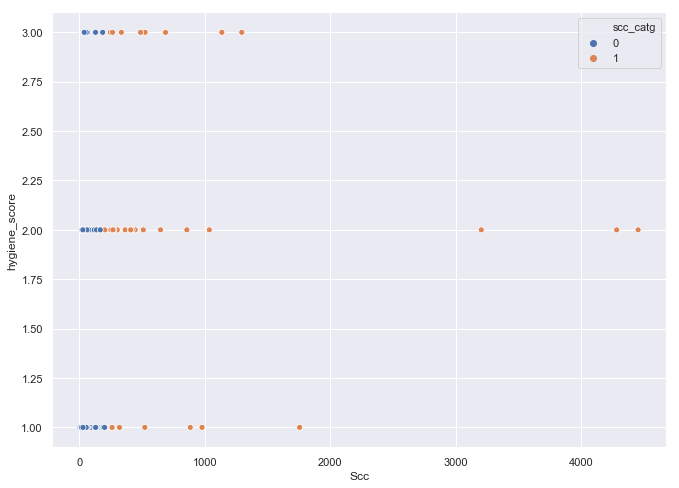

In [76]:
sns.scatterplot(x = 'Scc', y = 'hygiene_score', data = df_updated, hue = 'scc_catg')

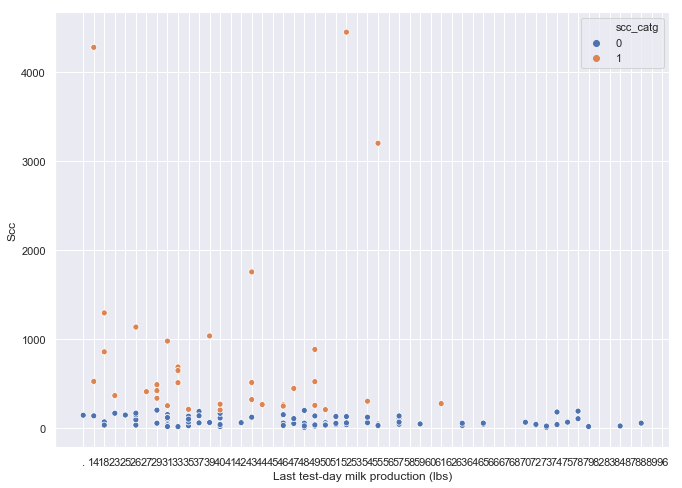

In [77]:
sns.scatterplot(x = 'Last test-day milk production (lbs)', y = 'Scc', data = df_updated, hue = 'scc_catg')

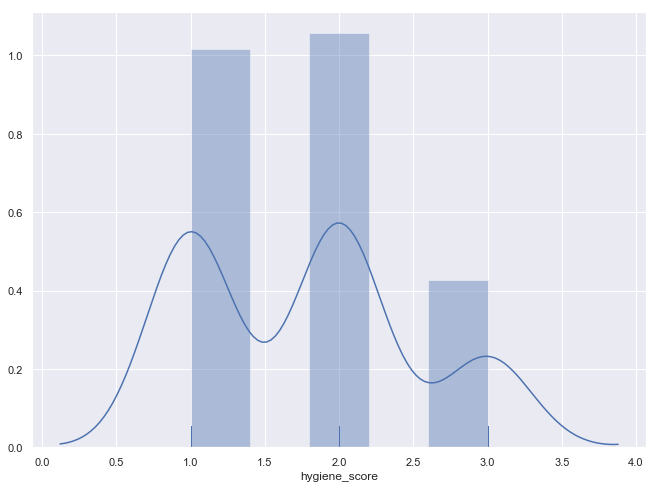

In [78]:
sns.distplot(df_updated['hygiene_score'], rug = True, hist = True)

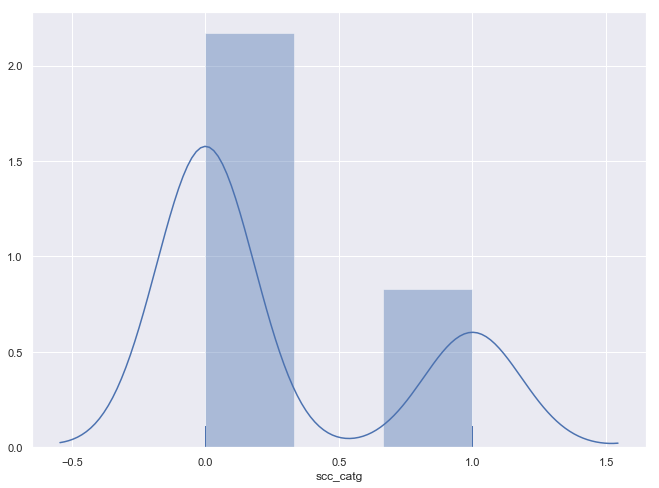

In [79]:
sns.distplot(df_updated['scc_catg'], rug = True, hist = True)

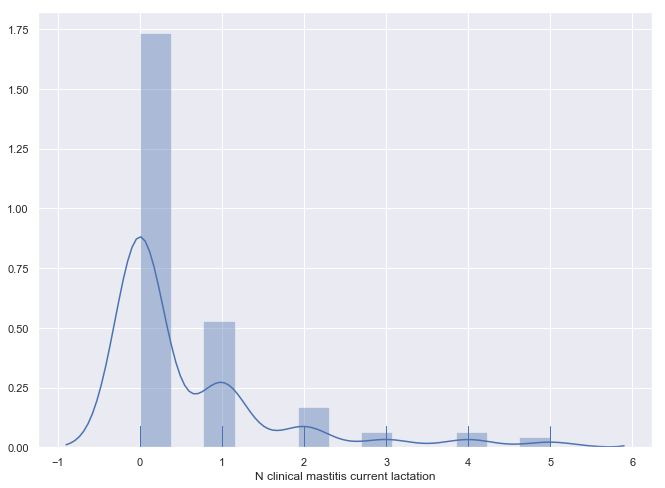

In [80]:
sns.distplot(df_updated['N clinical mastitis current lactation'], rug = True, hist = True)

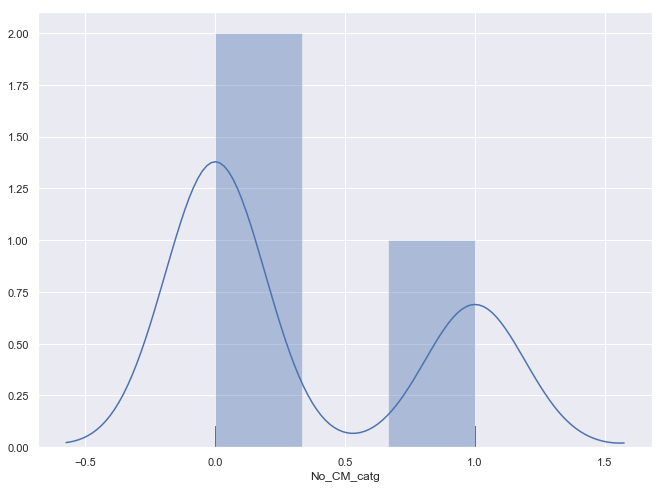

In [94]:
sns.distplot(df_updated['No_CM_catg'], rug = True, hist = True)

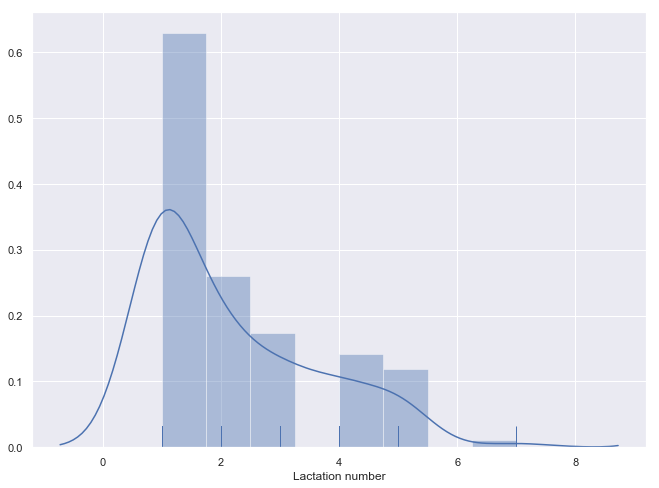

In [82]:
sns.distplot(df_updated['Lactation number'], rug = True, hist = True)

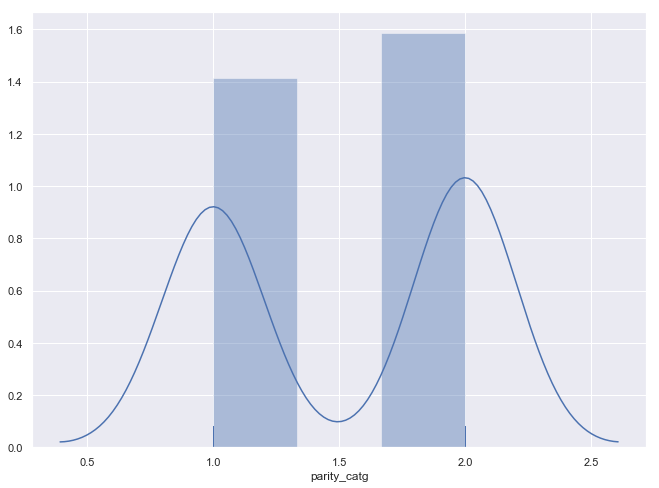

In [95]:
sns.distplot(df_updated['parity_catg'], rug = True, hist = True)

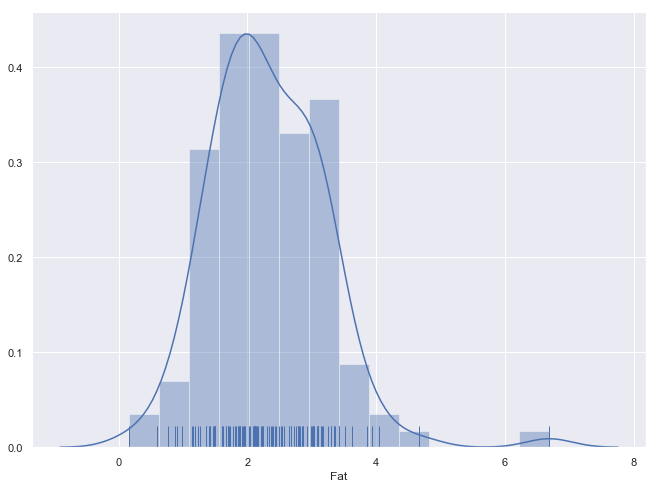

In [84]:
sns.distplot(df_updated['Fat'], rug = True, hist = True)

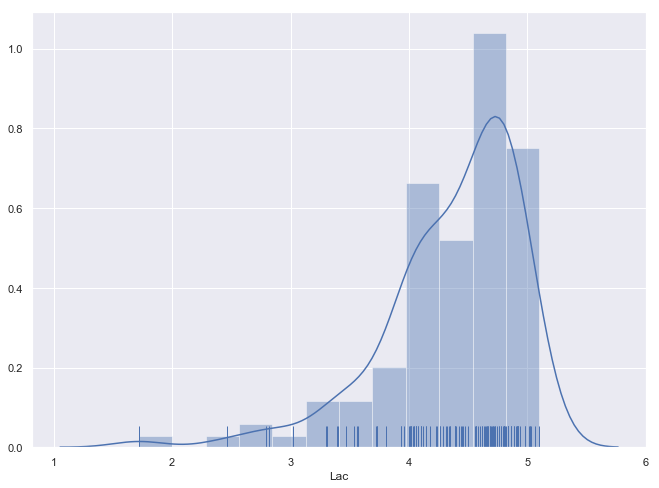

In [85]:
sns.distplot(df_updated['Lac'], rug = True, hist = True)

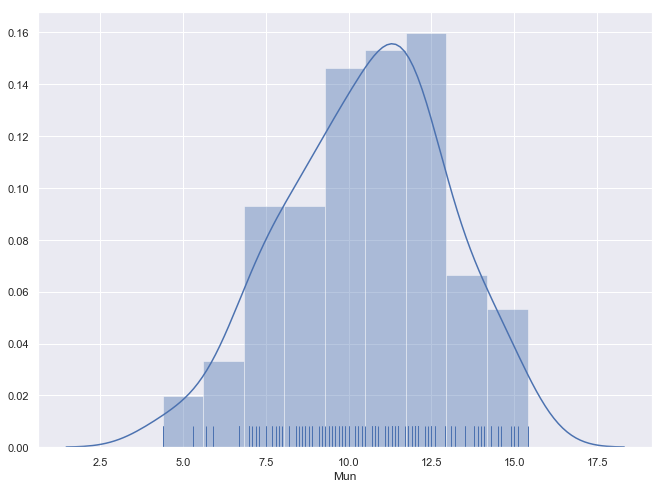

In [86]:
sns.distplot(df_updated['Mun'], rug = True, hist = True)

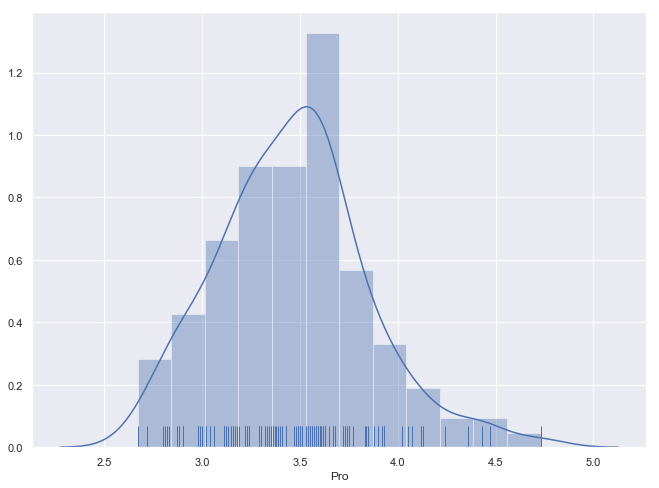

In [87]:
sns.distplot(df_updated['Pro'], rug = True, hist = True)

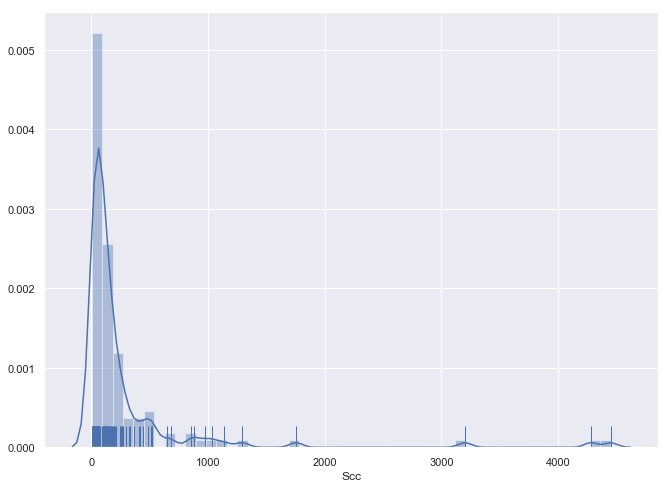

In [88]:
sns.distplot(df_updated['Scc'], rug = True, hist = True)

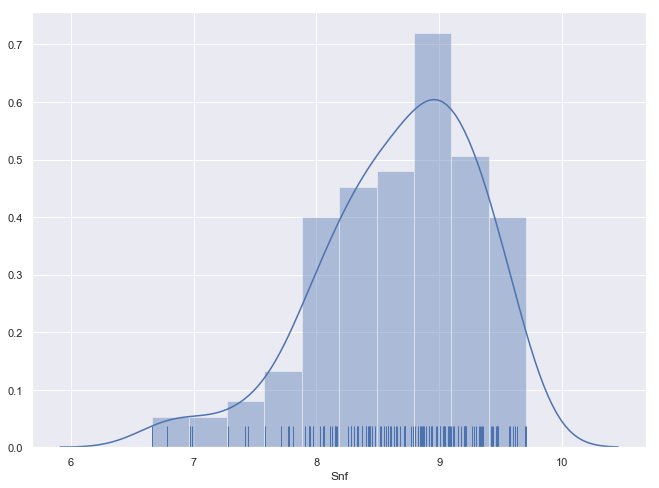

In [89]:
sns.distplot(df_updated['Snf'], rug = True, hist = True)

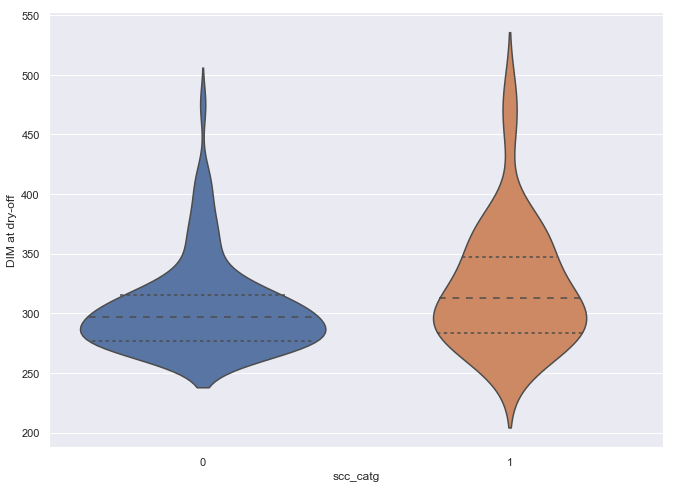

In [90]:
sns.violinplot(x = 'scc_catg', y = 'DIM at dry-off', data = df_, inner = 'quartile')
               #order = ['convalescent', 'first_week', 'second_week', 'third_week'])